# Lab 1 - Python fundamentals

Welcome to my lab 1, I did solve almost everything with the knowledge from the video turtorials, classes and exercises. However I did talk to my study group (Anja and Rikard) but we didn't share our codes until we had completed task 1 and 2. I did use chatgpt once to find out why I had an empty dict and how to fix it.

In [29]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re


data_path = "data"
path_dna = f"{data_path}/dna_raw.txt"
path_dna_complicated = f"{data_path}/dna_raw_complicated.txt"

def extract_clean_data(path):
    #Extracts the data into a string and then cleans it and puts each sequence into a list
    with open(path, "r") as file:
        text = file.read()

        text = re.sub(r"\d", "", text)
        text = re.sub("\n", "", text)
        text = text.lower() 
        texts = text.split(">seq")
        return texts
    
def sort_DNA_to_dicts(texts):
    #Sorts the DNA strands from list to dict and counts each strand
    dna_list = []
    for text in texts:
        #this is to exclude the first item of the list which is empty(or any item that is empty) TDLR: did use chatgpt to find this problem and how to handle it
        if not text.strip():
            continue
        sequence = dict(a = 0, t =0, c = 0, g = 0)
        for letter in text: 
            if letter == "a":
                sequence["a"] += 1
            if letter == "t":
                sequence["t"] += 1
            if letter == "c":
                sequence["c"] += 1
            if letter == "g":
                sequence["g"] += 1
        dna_list.append(sequence)
    return dna_list

def plot_bar_chart(sequences):
    #plots the data to matplotlib bar charts for each sequence
    fig, ax = plt.subplots(len(sequences), figsize=(12,40))
    
    i = 0
    for sequence in sequences:
        ax[i].bar(*zip(*sequence.items())) 
        ax[i].set(title=(f"DNA Sequence {i+1}"),xlabel=("DNA Letters"), ylabel=("Frequency"))
        ax[i].yaxis.set_major_locator(MaxNLocator(integer = True))
        i += 1

#### Run this block to test the dna_raw document

In [30]:
dna_texts = extract_clean_data(path_dna)

#### Run this block to test the dna_raw_complicated document

In [32]:
dna_texts = extract_clean_data(path_dna_complicated)

#### Run this after you have selected the text file

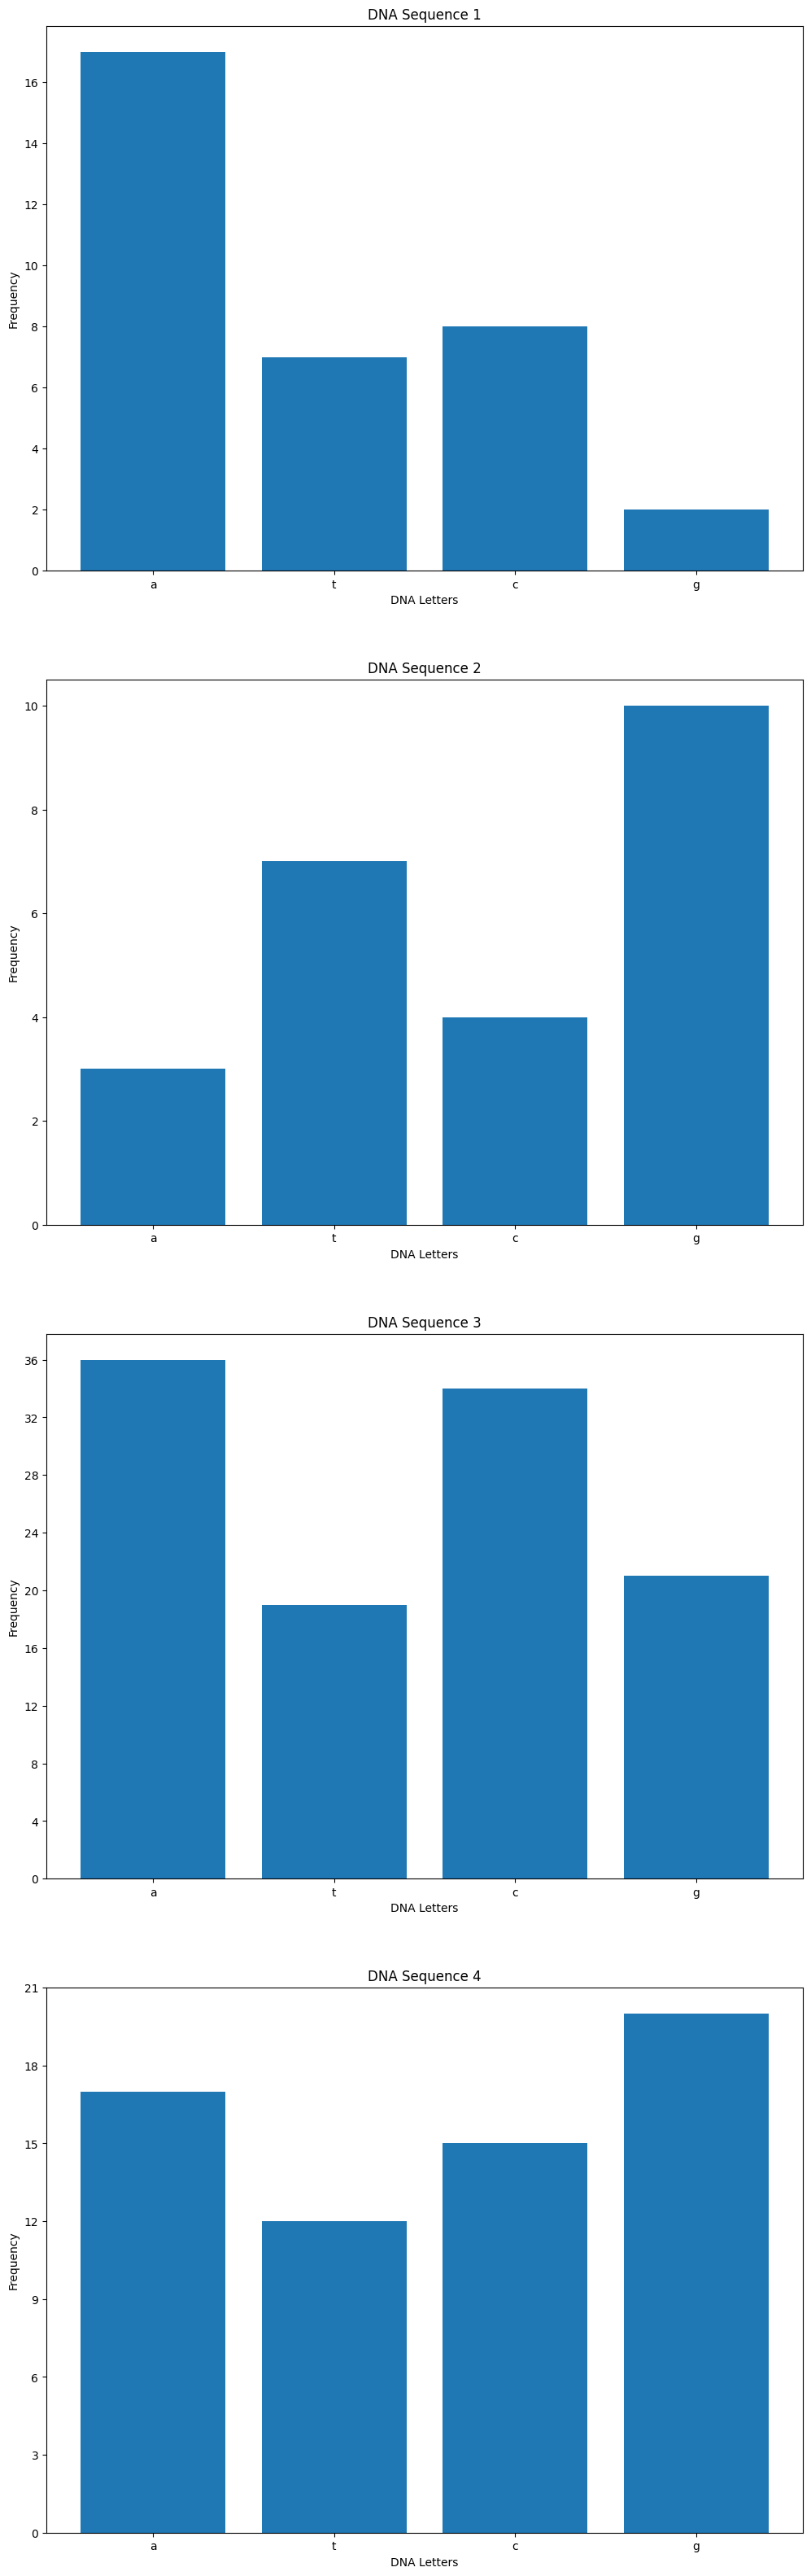

In [33]:
dna_sequences = sort_DNA_to_dicts(dna_texts)
plot_bar_chart(dna_sequences)